# 상관분석

25.07.15(화) 오전수업
- %pip install openpyxl


# 상관분석

두 변수 간의 관계를 정략적으로 평가하는 통계 기법으로 하나의 변수가 변할 때 다른 변수가 어떻게 변하는지 파악할 수 있다.

## 상관계수

두 변수간의 선형 관계의 정도를 정량적으로 나타내는 값으로 기술통계 값의 범위는 -1과 +1 사이   

- 상관관계는 변수 간 관계의 동적 성질을 반영
- 상관관계의 방향
• 양의 상관관계 : 한 변수가 증가할 때 다른 변수도 증가하는 경향이 있는 경우
• 음의 상관관계 : 한 변수가 증가할 때 다른 변수는 감소하는 경향이 있는 경우
- 상관관계의 강도
• 강한 상관관계 : 상관계수의 절댓값이 0.7 이상
• 중간 상관관계 : 상관계수의 절댓값이 0.3~0.7 사이
• 약한 상관관계 : 상관계수의 절댓값이 0.3 미만

![상관관계](images\상관관계.png)


### **상관관계 유형과 변수 사이의 대응 관계**

| 변수 X의 변화 | 변수 Y의 변화 | 상관관계 유형 | 값의 범위 | 예시 |
| --- | --- | --- | --- | --- |
| X값 증가 | Y값 증가 | 직접/양의 상관관계 | 0 ~ +1 | 공부를 더 많이 하면 시험 점수도 오를 것이다. |
| X값 감소 | Y값 감소 | 직접/양의 상관관계 | 0 ~ +1 | 예금을 더 적게 하면, 이자도 적을 것이다. |
| X값 증가 | Y값 감소 | 간접/음의 상관관계 | -1 ~ 0 | 더 많이 운동하면, 몸무게는 감소할 것이다. |
| X값 감소 | Y값 증가 | 간접/음의 상관관계 | -1 ~ 0 | 더 적은 시간 동안 문제를 풀면, 문제 틀릴 가능성이 높아진다. |

- 쉽게 저지르는 또 다른 실수는 상관관계의 부호에 가치 판단적 의미를 부여하는 것
    - 많은 사람들은 음(-)의 상관관계가 좋지 않고, 양(+)의 상관관계가 좋은 것이라고 생각
    - 직접적 또는 간접적이라는 용어를 통해 의미를 더 명확하게 전달

## **결정계수** (coefficient of determination)

결정계수는 상관계수를 제곱한 값(r²)으로, 한 변수의 변동이 다른 변수에 의해 설명되는 정도를 나타낸다. 이 값은 0부터 1 사이의 범위를 가지며, 1에 가까울수록 변수 간 관계가 강함을 의미한다. 

회귀분석에서 모델의 적합도를 평가하는 중요한 지표로 사용된다.

- 다른 변수의 분산과 공유되는 한 변수의 분산의 비율
- 상관계수(r)의 제곱값으로, 0에서 1 사이의 값
- r = 0.7이면 r² = 0.49로, 한 변수의 변동 중 약 49%를 다른 변수로 설명할 수 있다

![결정계수](images/결정계수.png)


In [15]:
import pandas as pd
import warnings
warnings.simplefilter("ignore", UserWarning)


# 전체 엑셀 불러오기
df = pd.read_excel(r'C:\githome\9week_py_statistics\datalab.xlsx', header=None)

# ✅ 실제 데이터가 시작되는 행부터 불러오기 (예: 6행부터 시작)
data_df = pd.read_excel(r'C:\githome\9week_py_statistics\datalab.xlsx', skiprows=6)

# 데이터 확인
print(data_df.head())


           날짜      스트레스        날짜.1        운동        날짜.2        야식
0  2024-07-14  45.77084  2024-07-14  77.38452  2024-07-14  40.49190
1  2024-07-15  57.46850  2024-07-15  87.10257  2024-07-15  29.93401
2  2024-07-16  59.62807  2024-07-16  81.76364  2024-07-16  33.41331
3  2024-07-17  57.82843  2024-07-17  79.24415  2024-07-17  34.79304
4  2024-07-18  55.84883  2024-07-18  71.32573  2024-07-18  34.79304


In [16]:
# 날짜를 인덱스로 설정
data_df.set_index('날짜', inplace=True)

# 상관관계 분석
corr = data_df.corr(numeric_only=True)
print("\n📊 키워드 간 상관관계:")
print(corr)



📊 키워드 간 상관관계:
          스트레스        운동        야식
스트레스  1.000000  0.602471 -0.325516
운동    0.602471  1.000000 -0.213181
야식   -0.325516 -0.213181  1.000000


In [17]:
corr_df = data_df[['스트레스', '운동', '야식']]
corr_df.corr()

,스트레스,운동,야식
스트레스,1.000000,0.602471,-0.325516
운동,0.602471,1.000000,-0.213181
야식,-0.325516,-0.213181,1.000000


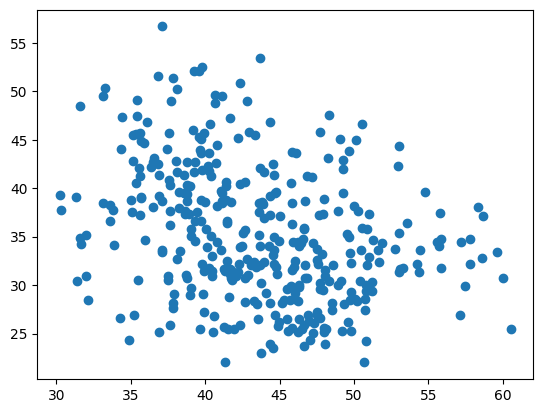

In [18]:
import matplotlib.pyplot as plt
plt.scatter(corr_df['스트레스'], corr_df['야식'] )
plt.show()

# 상관분석의 방법

**피어슨** 상관분석(Pearson correlation analysis)은 가장 일반적인 상관분석 방법.

**스피어만** 상관분석(Spearman correlation analysis)은 데이터의 순위 값으로 상관성을 측정한다.  그래서  두 변수의 데이터가 정규분포를 따르지 않거나, 순서형 척도일 때 적합하다. 

**켄달** 상관분석(Kendall correlation analysis)은 스피어만 상관분석과 비슷하나 **표본 데이터가 적고** 동점이 많을 때 사용하기 적합한 방법.

## 피어슨 상관계수 (Pearson Correlation Coefficient)

**연속형** 변수 간의 선형 관계를 측정한다.  두 변수의 공분산을 각 변수의 표준편차로 나누어 계산
즉, **두 변수가 얼마나 함께 변하는지를 표준편차를 통해 정규화한 값**

- 𝑟 = 1: 완전한 양의 상관관계
- 𝑟 = −1: 완전한 음의 상관관계
- 𝑟 = 0: 상관관계 없음

In [ ]:
# 예시: 키와 몸무게 간의 관계 (일반적으로 키가 큰 사람이 몸무게도 더 나가는 경향이 있을 때 사용)

import pandas as pd
from scipy.stats import pearsonr

# 예시 데이터
data = {
    'height': [160, 165, 170, 175, 180],
    'weight': [50, 55, 65, 70, 80]
}
df = pd.DataFrame(data)

# 피어슨 상관계수 계산
corr, p_value = pearsonr(df['height'], df['weight'])

print(f"피어슨 상관계수: {corr:.2f}")
print(f"p-값: {p_value:.4f}")


피어슨 상관계수: 0.99
p-값: 0.0006


## 스피어만 상관계수 (Spearman's Rank Correlation Coefficient)

**순위형** 변수 간의 관계 측정한다. 비선형 관계일 경우에도 사용 가능하다.
각 변수의 순위를 매긴 후, 그 순위들 간의 상관계수를 계산 한다.

- 𝑟𝑠 = 1: 완전한 양의 상관관계
- 𝑟𝑠 = −1: 완전한 음의 상관관계
- 𝑟𝑠 = 0: 상관관계 없음

비선형 관계와 이상치에 민감하지 않지만, 데이터의 순위 정보만 사용하여 정보 손실이 발생할 수 있음 (원래 데이터의 크기 정보 등)

In [26]:
# 예시: 학생 성적 순위와 스포츠 성적 순위 간의 관계.
import pandas as pd
from scipy.stats import spearmanr

# 데이터프레임 구성
data = {
    'student': ['A', 'B', 'C', 'D', 'E'],
    'academic_rank': [1, 2, 3, 4, 5],
    'sports_rank': [4, 2, 1, 3, 5]
}
df = pd.DataFrame(data)

# 스피어만 상관계수 계산
rho, pval = spearmanr(df['academic_rank'], df['sports_rank'])

print(f"스피어만 상관계수: {rho:.3f}")
print(f"p-value: {pval:.4f}")


스피어만 상관계수: 0.300
p-value: 0.6238


## 켄달의 타우 (Kendall's Tau, Kendall's Rank Correlation Coefficient)

변수의 순서 간의 상관성을 측정한다.  
순위 쌍 간의 일치와 불일치를 비교하여 상관관계를 계산한다. 작은 데이터셋에 적합한 방법.

피어슨 상관계수와 동일하게 해석함 (𝜏)

순위 정보에 기반하여 비선형 관계도 잘 반영하지만, 계산이 복잡하며, 해석이 어려울 수 있음 (특히 데이터셋이 클 경우 계산 부담 증가)

![켄달의타우](images\켄달의타우.png)

In [27]:
# 예시 : 직무 수행 순위와 승진 순위 간의 관계
import pandas as pd
from scipy.stats import kendalltau

# 사람 A~E의 키와 몸무게 순위
data = {
    'Person': ['A', 'B', 'C', 'D', 'E'],
    'Height_rank': [1, 2, 3, 4, 5],     # 키 순위
    'Weight_rank_1': [3, 4, 1, 2, 5],   # τ = 0.2
    'Weight_rank_2': [1, 2, 3, 4, 5],   # τ = 1
    'Weight_rank_3': [5, 4, 3, 2, 1]    # τ = -1
}

df = pd.DataFrame(data)

# 계수 계산
tau1, _ = kendalltau(df['Height_rank'], df['Weight_rank_1'])
tau2, _ = kendalltau(df['Height_rank'], df['Weight_rank_2'])
tau3, _ = kendalltau(df['Height_rank'], df['Weight_rank_3'])

print(f"상관계수 (Weight_rank_1): {tau1:.2f}")
print(f"상관계수 (Weight_rank_2): {tau2:.2f}")
print(f"상관계수 (Weight_rank_3): {tau3:.2f}")


상관계수 (Weight_rank_1): 0.20
상관계수 (Weight_rank_2): 1.00
상관계수 (Weight_rank_3): -1.00
